In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Twitter_volume_AMZN.csv', parse_dates=['timestamp'])
df.set_index('timestamp', inplace=True)

In [3]:
df = df.resample('5T').mean().interpolate()

/tmp/ipykernel_3996/915682922.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df = df.resample('5T').mean().interpolate()


In [11]:
df

,value,smoothed,anomaly
timestamp,,,
2015-02-26 21:40:00,57.0,NaN,0
2015-02-26 21:45:00,43.0,NaN,0
2015-02-26 21:50:00,55.0,62.4,0
2015-02-26 21:55:00,64.0,71.8,0
2015-02-26 22:00:00,93.0,81.0,0
...,...,...,...
2015-04-22 20:30:00,51.0,58.6,0
2015-04-22 20:35:00,54.0,54.6,0
2015-04-22 20:40:00,46.0,51.4,0


In [4]:
df['smoothed'] = df['value'].rolling(window=5, center=True).mean()

In [10]:
df

,value,smoothed,anomaly
timestamp,,,
2015-02-26 21:40:00,57.0,NaN,0
2015-02-26 21:45:00,43.0,NaN,0
2015-02-26 21:50:00,55.0,62.4,0
2015-02-26 21:55:00,64.0,71.8,0
2015-02-26 22:00:00,93.0,81.0,0
...,...,...,...
2015-04-22 20:30:00,51.0,58.6,0
2015-04-22 20:35:00,54.0,54.6,0
2015-04-22 20:40:00,46.0,51.4,0


In [5]:
window = 30
rolling_mean = df['smoothed'].rolling(window).mean()
rolling_std = df['smoothed'].rolling(window).std()

In [6]:
z_score = (df['smoothed'] - rolling_mean) / rolling_std


In [9]:
z_score

timestamp
2015-02-26 21:40:00         NaN
2015-02-26 21:45:00         NaN
2015-02-26 21:50:00         NaN
2015-02-26 21:55:00         NaN
2015-02-26 22:00:00         NaN
                         ...   
2015-04-22 20:30:00   -0.732422
2015-04-22 20:35:00   -1.011334
2015-04-22 20:40:00   -1.186189
2015-04-22 20:45:00         NaN
2015-04-22 20:50:00         NaN
Freq: 5min, Name: smoothed, Length: 15831, dtype: float64

In [7]:
threshold = 3
df['anomaly'] = (np.abs(z_score) > threshold).astype(int)


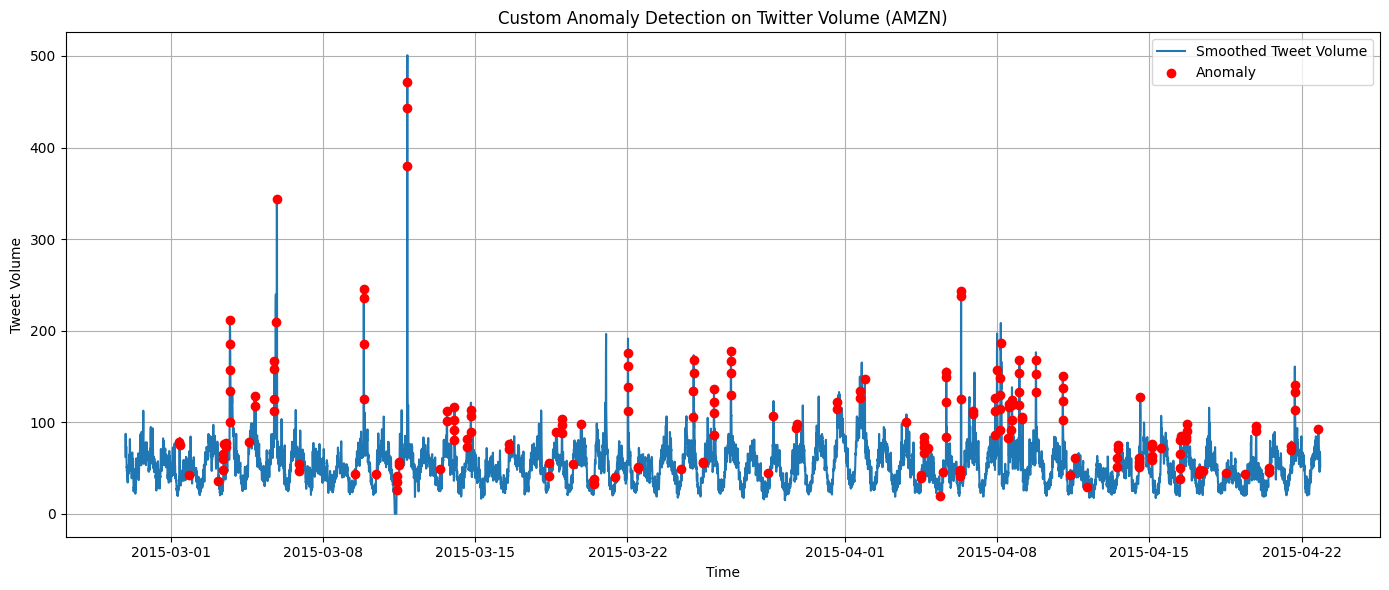

In [8]:
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['smoothed'], label='Smoothed Tweet Volume')
plt.scatter(df.index[df['anomaly'] == 1], df['smoothed'][df['anomaly'] == 1],
            color='red', label='Anomaly', zorder=3)
plt.title("Custom Anomaly Detection on Twitter Volume (AMZN)")
plt.xlabel("Time")
plt.ylabel("Tweet Volume")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
df[df['anomaly'] == 1].to_csv("anomalies_detected.csv")
